In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['target'] = data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
x = df.drop(['target'],axis=1)
y = df['target']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [9]:
(x_train.shape),(x_test.shape)

((404, 13), (102, 13))

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
model.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [12]:
from sklearn.metrics import r2_score

R2 score of testing data is: 0.5892223849182535
   column_name  coefficient_values
0         CRIM           -0.119443
1           ZN            0.044780
2        INDUS            0.005485
3         CHAS            2.340804
4          NOX          -16.123604
5           RM            3.708709
6          AGE           -0.003121
7          DIS           -1.386397
8          RAD            0.244178
9          TAX           -0.010990
10     PTRATIO           -1.045921
11           B            0.008110
12       LSTAT           -0.492793


<BarContainer object of 13 artists>

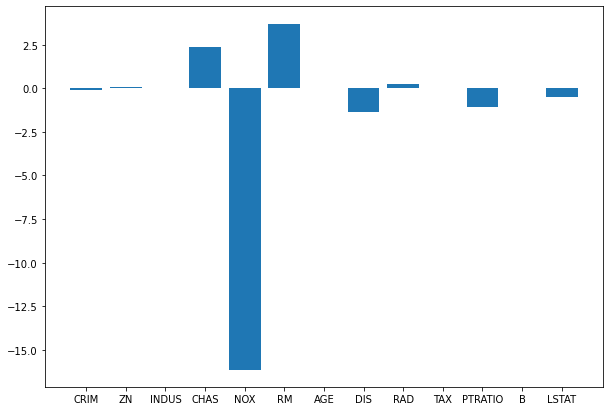

In [13]:
R2_scored = r2_score(y_test,model.predict(x_test))
print('R2 score of testing data is:',R2_scored)

coefficient_df = pd.DataFrame()
coefficient_df['column_name'] = x_train.columns
coefficient_df['coefficient_values']=pd.Series(model.coef_)
print(coefficient_df)



plt.figure(figsize=(10,7))
plt.bar(coefficient_df['column_name'],coefficient_df['coefficient_values'])

#### Ridge Regression (L2 penalty ('shrink your coefficient values'))

In [24]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=1)
rd.fit(x_train,y_train)

Ridge(alpha=5)

R2 score of testing data is: 0.5679816088812537
   column_name  coefficient_values
0         CRIM           -0.114955
1           ZN            0.047543
2        INDUS           -0.045221
3         CHAS            2.002507
4          NOX           -2.984734
5           RM            3.678423
6          AGE           -0.014863
7          DIS           -1.204531
8          RAD            0.210317
9          TAX           -0.012127
10     PTRATIO           -0.919075
11           B            0.008820
12       LSTAT           -0.511367


<BarContainer object of 13 artists>

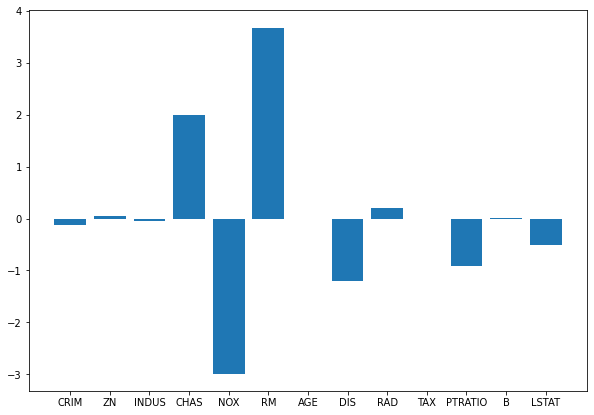

In [25]:
R2_scored = r2_score(y_test,rd.predict(x_test))
print('R2 score of testing data is:',R2_scored)

coefficient_df = pd.DataFrame()
coefficient_df['column_name'] = x_train.columns
coefficient_df['coefficient_values']=pd.Series(rd.coef_)
print(coefficient_df)

plt.figure(figsize=(10,7))
plt.bar(coefficient_df['column_name'],coefficient_df['coefficient_values'])

#### Lasso Regression (L1 penalty ('no changes in coefficient values but affect your accuracy'))

In [22]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.00001)
ls.fit(x_train,y_train)

Lasso(alpha=1e-05)

R2 score of testing data is: 0.5892187609131101
   column_name  coefficient_values
0         CRIM           -0.116808
1           ZN            0.046003
2        INDUS           -0.023762
3         CHAS            2.278150
4          NOX           -8.557796
5           RM            3.755135
6          AGE           -0.010414
7          DIS           -1.280095
8          RAD            0.222038
9          TAX           -0.011526
10     PTRATIO           -0.969288
11           B            0.008535
12       LSTAT           -0.498849


<BarContainer object of 13 artists>

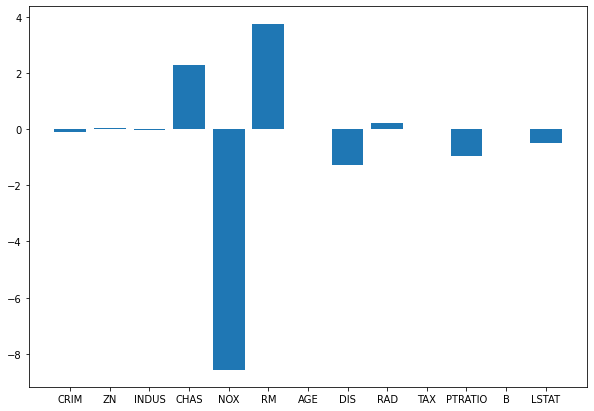

In [23]:
R2_scored = r2_score(y_test,ls.predict(x_test))
print('R2 score of testing data is:',R2_scored)

coefficient_df = pd.DataFrame()
coefficient_df['column_name'] = x_train.columns
coefficient_df['coefficient_values']=pd.Series(rd.coef_)
print(coefficient_df)

plt.figure(figsize=(10,7))
plt.bar(coefficient_df['column_name'],coefficient_df['coefficient_values'])

#### Elastic net (L1 + L2)

In [31]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=5)
en.fit(x_train,y_train)

ElasticNet(alpha=5)

R2 score of testing data is: 0.5006003732089013
   column_name  coefficient_values
0         CRIM           -0.114955
1           ZN            0.047543
2        INDUS           -0.045221
3         CHAS            2.002507
4          NOX           -2.984734
5           RM            3.678423
6          AGE           -0.014863
7          DIS           -1.204531
8          RAD            0.210317
9          TAX           -0.012127
10     PTRATIO           -0.919075
11           B            0.008820
12       LSTAT           -0.511367


<BarContainer object of 13 artists>

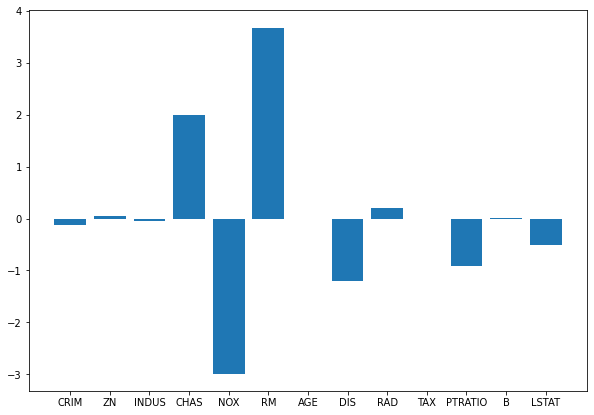

In [30]:
R2_scored = r2_score(y_test,en.predict(x_test))
print('R2 score of testing data is:',R2_scored)

coefficient_df = pd.DataFrame()
coefficient_df['column_name'] = x_train.columns
coefficient_df['coefficient_values']=pd.Series(rd.coef_)
print(coefficient_df)

plt.figure(figsize=(10,7))
plt.bar(coefficient_df['column_name'],coefficient_df['coefficient_values'])